In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [46]:
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [47]:
# Load the dataset
df = pd.read_csv('insurance.csv')


In [48]:
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [50]:
# Dropping unwanted columns
df = df.drop(columns=['index'])

In [51]:
#checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [52]:
df.shape

(1338, 7)

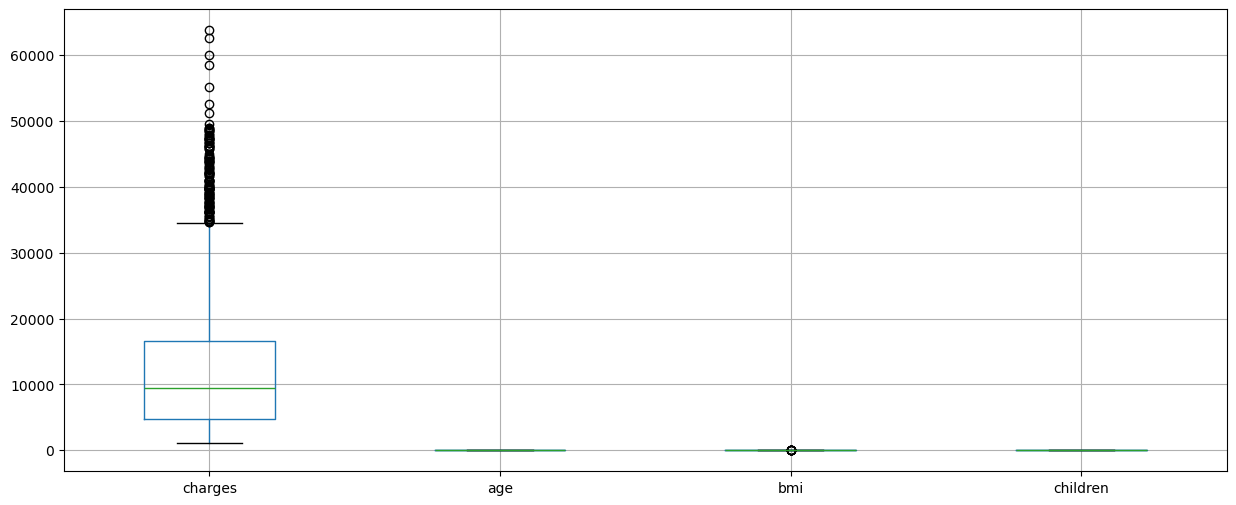

In [53]:
# Specify the numerical columns
numerical_columns = ['charges', 'age', 'bmi', 'children']

# Plot box plots for these numerical columns
plt.figure(figsize=(15, 6))
df[numerical_columns].boxplot()
plt.show()

In [54]:
# Calculate Z-scores for numerical columns
z_scores = df[numerical_columns].apply(zscore)

# Keep rows where Z-scores are less than 3
df = df[(z_scores < 3).all(axis=1)]

In [55]:
#Checking data frame shape after removing outliers
df.shape

(1309, 7)

In [56]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


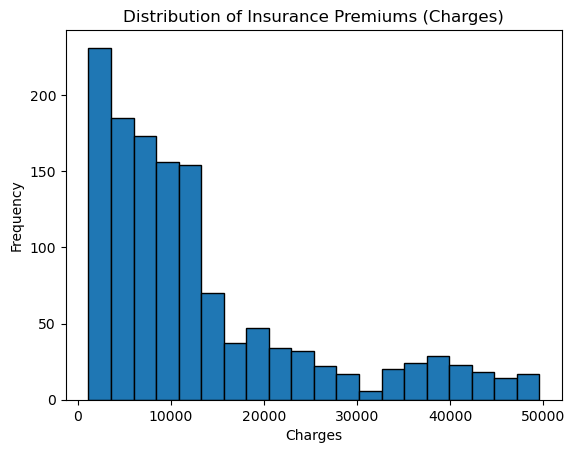

In [58]:
# Plot the distribution of the target variable
plt.hist(df['charges'], bins=20, edgecolor='black')
plt.title('Distribution of Insurance Premiums (Charges)')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [59]:
# Identifying categorical columns to encode
categorical_columns = ['smoker', 'region','sex']  

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows to confirm
df.head()

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest,sex_male
0,19,27.900,0,16884.92400,True,False,False,True,False
1,18,33.770,1,1725.55230,False,False,True,False,True
2,28,33.000,3,4449.46200,False,False,True,False,True
3,33,22.705,0,21984.47061,False,True,False,False,True
4,32,28.880,0,3866.85520,False,True,False,False,True


In [60]:
# Separating target and features
X = df.drop(columns=['charges'])  # Features
y = df['charges']  # Target

In [61]:
X.head()

,age,bmi,children,smoker_yes,region_northwest,region_southeast,region_southwest,sex_male
0,19,27.900,0,True,False,False,True,False
1,18,33.770,1,False,False,True,False,True
2,28,33.000,3,False,False,True,False,True
3,33,22.705,0,False,True,False,False,True
4,32,28.880,0,False,True,False,False,True


In [62]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [63]:
# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train.shape

(1047, 8)

In [65]:
X_test.shape

(262, 8)

In [66]:
y_train.shape

(1047,)

In [67]:
y_test.shape

(262,)

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest Training Mean Squared Error: 3585064.0932144644
Random Forest Testing Mean Squared Error: 18222099.29270545
Random Forest Training R^2 Score: 0.9739604655874685
Random Forest Testing R^2 Score: 0.8675647863630198


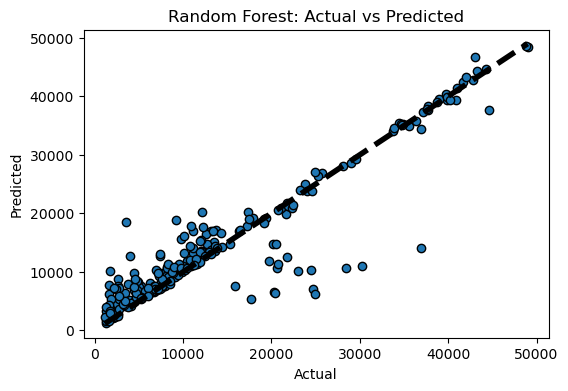

In [79]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error, r2_score  
import matplotlib.pyplot as plt

#Defining the moedl
model_2 = RandomForestRegressor(n_estimators=100, random_state=42)

#Applying on training data
model_2.fit(X_train_scaled, y_train)

train_pred = model_2.predict(X_train_scaled)
test_pred = model_2.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)


print(f"Random Forest Training Mean Squared Error: {train_mse}")
print(f"Random Forest Testing Mean Squared Error: {test_mse}")
print(f"Random Forest Training R^2 Score: {train_r2}")
print(f"Random Forest Testing R^2 Score: {test_r2}")

# Comparison of visual predictions with actual values (Random forest)
plt.figure(figsize=(6, 4))
plt.scatter(y_test, test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

Linear Regression Training Mean Squared Error: 34873610.1034764
Linear Regression Testing Mean Squared Error: 30444091.526395813
Linear Regression Training R^2 Score: 0.7467011616061625
Linear Regression Testing R^2 Score: 0.7787373616773112


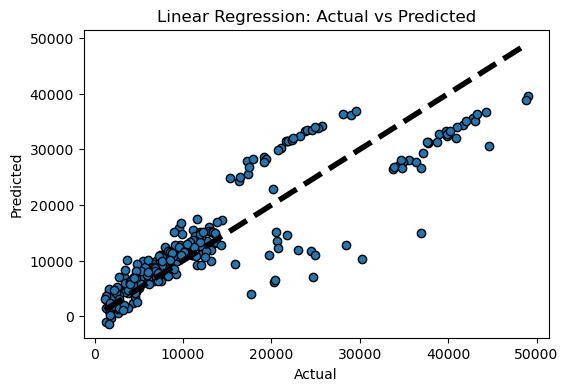

In [77]:


#Defining the moedl
model_1 =  LinearRegression()

#Applying on training data
model_1.fit(X_train_scaled, y_train)

train_pred = model_1.predict(X_train_scaled)
test_pred = model_1.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"Linear Regression Training Mean Squared Error: {train_mse}")
print(f"Linear Regression Testing Mean Squared Error: {test_mse}")
print(f"Linear Regression Training R^2 Score: {train_r2}")
print(f"Linear Regression Testing R^2 Score: {test_r2}")

# Visualizing predictions with actual values (Random forest)
plt.figure(figsize=(6, 4))
plt.scatter(y_test, test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

Ridge Regression Training Mean Squared Error: 34873706.539015
Ridge Regression Testing Mean Squared Error: 30444628.509259645
Ridge Regression Training R^2 Score: 0.7467004611621926
Ridge Regression Testing R^2 Score: 0.7787334589743817


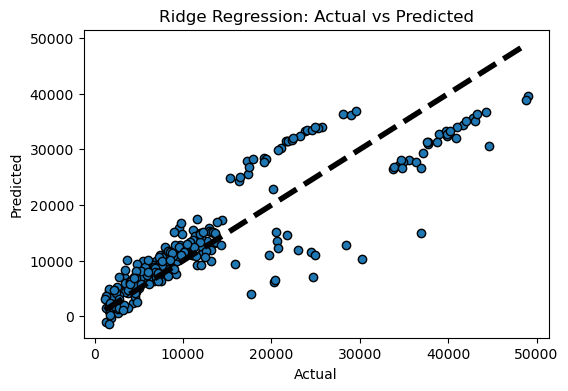

In [78]:
# Import the necessary libraries
from sklearn.linear_model import Ridge

#Defining the moedl
model_3 =  Ridge(alpha=1.0)

#Applying on training data
model_3.fit(X_train_scaled, y_train)

train_pred = model_3.predict(X_train_scaled)
test_pred = model_3.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)


print(f"Ridge Regression Training Mean Squared Error: {train_mse}")
print(f"Ridge Regression Testing Mean Squared Error: {test_mse}")
print(f"Ridge Regression Training R^2 Score: {train_r2}")
print(f"Ridge Regression Testing R^2 Score: {test_r2}")

# Comparison of visual predictions with actual values (Random forest)
plt.figure(figsize=(6, 4))
plt.scatter(y_test, test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted')
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  15.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   4.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   6.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   7.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  16.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   2.2s
[CV] END max_

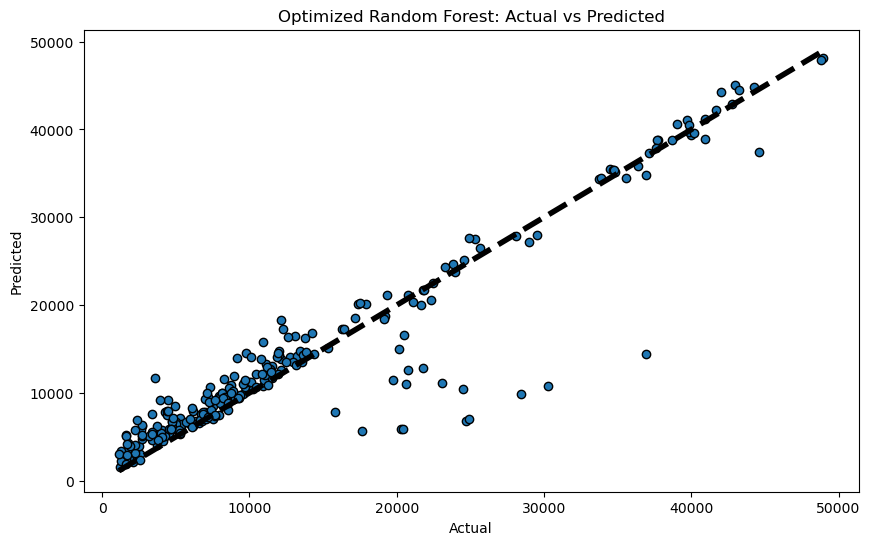

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  15.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   4.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  10.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  10.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   4.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   6.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   9.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   2.7s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total t

In [208]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the model
rf_model = RandomForestRegressor(random_state=42)

# Performing GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fitting with the grid search (training data)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_rf_model = grid_search.best_estimator_

# Predict on the test set
best_rf_test_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the model
best_rf_test_mse = mean_squared_error(y_test, best_rf_test_pred)
best_rf_test_r2 = r2_score(y_test, best_rf_test_pred)

print(f"Enhanced Random Forest Testing Mean Squared Error: {best_rf_test_mse}")
print(f"Enhanced Random Forest Testing R^2 Score: {best_rf_test_r2}")

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_rf_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Optimized Random Forest: Actual vs Predicted')
plt.show()

Training Mean Squared Error: 34873610.1034764
Testing Mean Squared Error: 30444091.526395813
Training R^2 Score: 0.7467011616061625
Testing R^2 Score: 0.7787373616773112


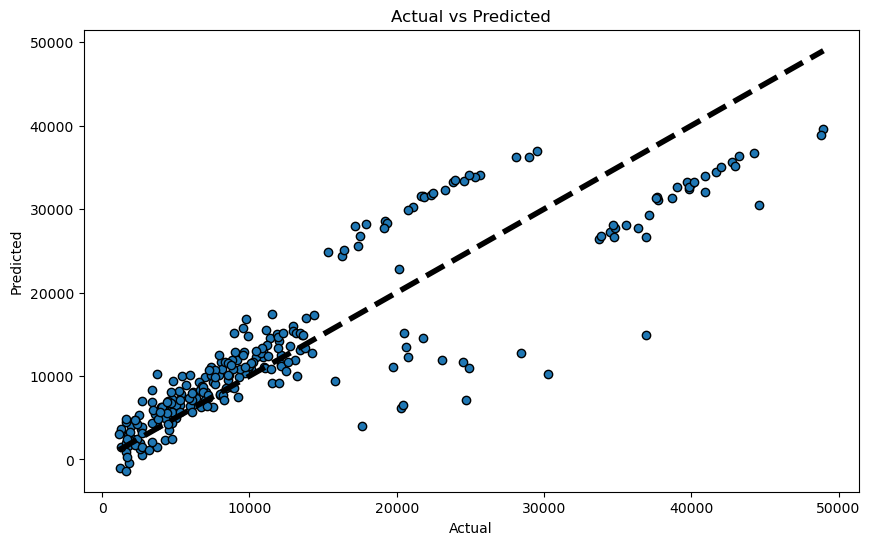

In [167]:
#linear regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


print(f"Training Mean Squared Error: {train_mse}")
print(f"Testing Mean Squared Error: {test_mse}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing R^2 Score: {test_r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Ridge Training Mean Squared Error: 34873706.539015
Ridge Testing Mean Squared Error: 30444628.509259645
Ridge Training R^2 Score: 0.7467004611621926
Ridge Testing R^2 Score: 0.7787334589743817


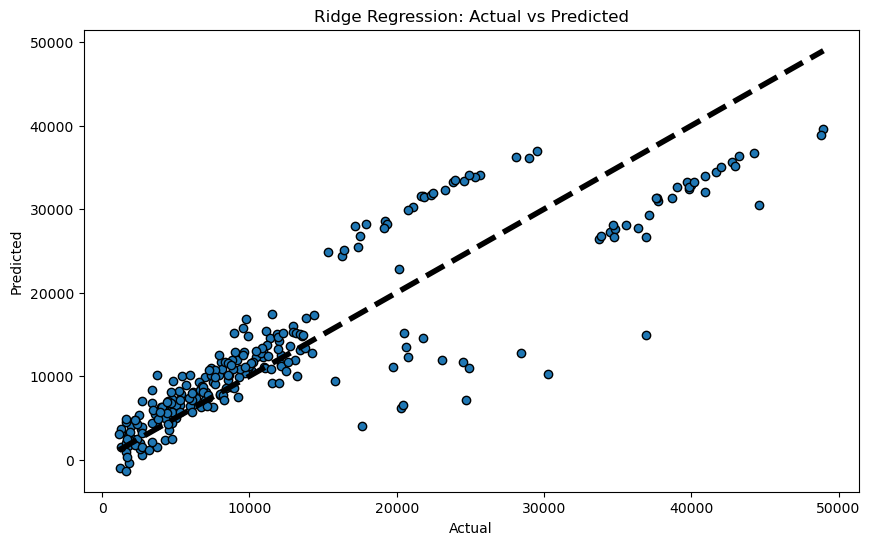

In [172]:
# Import the necessary libraries
from sklearn.linear_model import Ridge  # Importing Ridge regression model
from sklearn.metrics import mean_squared_error, r2_score  # Importing metrics for evaluation
import matplotlib.pyplot as plt 
#ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

ridge_train_pred = ridge_model.predict(X_train_scaled)
ridge_test_pred = ridge_model.predict(X_test_scaled)

ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)


print(f"Ridge Training Mean Squared Error: {ridge_train_mse}")
print(f"Ridge Testing Mean Squared Error: {ridge_test_mse}")
print(f"Ridge Training R^2 Score: {ridge_train_r2}")
print(f"Ridge Testing R^2 Score: {ridge_test_r2}")


# Comparison of visual prediction results with actual values (Ridge regression)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted')
plt.show()